### Question 1: -
Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input - string = “write write write all the number from from from 1 to 100”
Example output - 5
Explanation - From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5

In [1]:
from statistics import mode

string  = "number write write write all the number number from from from number 1 to 100 number"

temp = [i for i in string.split()]
print(len(mode(temp)))


6


###  Question 2: -
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }
Example output 1- YES
Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves
character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }
Example output 2 - NO

In [2]:
input = "abcdd"
_list = {input.count(i) for i in input}

if len(_list) > 1:
    print("NO")
else :
    print("Yes")
    


NO


### Question 3: -
Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json

Data Attributes - 
● id: Identification Number - int 
● num: Number of the pokemon in the official Pokédex - int 
● name: pokemon name - string 
● img: URL to an image of this pokemon - string 
● type: pokemon type -string 
● height: pokemon height - float
● weight: pokemon weight - float 
● candy: type of candy used to evolve pokemon or given when transferred - string 
● candy_count: the amount of candies required to evolve - int
● egg: Number of kilometers to travel to hatch the egg - float 
● spawn_chance: Percentage of spawn chance (NEW) - float avg_spawns: Number of this pokemon on 10.000 spawns (NEW) - int
● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all time zones and are expressed in local time. (NEW) - “minutes: seconds”
● multipliers: Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
● weakness: Types of pokemon this pokemon is weak to - list of strings 
● next_evolution: Number and Name of successive evolutions of pokemon - list of dict
● prev_evolution: Number and Name of previous evolutions of pokemon - - list of dict

In [3]:
import pandas as pd
import numpy as np

transactions_url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
df_3 = pd.read_json(transactions_url)


In [4]:
def convert(df):
    df_data= []
    id_arr = num_arr = name_arr =  img_arr = type_arr = height_arr = weight_arr = candy_arr = candy_count_arr = egg_arr = spawn_chance_arr = spawn_time_arr = multipliers_arr = weakness_arr = next_arr = prev_arr = np.array([])
    for row in df.index:
        id_arr = np.append(id_arr, df.iloc[row][0]["id"])
        num_arr = np.append(num_arr, df.iloc[row][0]["num"])
        name_arr = np.append(name_arr, df.iloc[row][0]["name"])
        img_arr = np.append(img_arr, df.iloc[row][0]["img"])
        type_arr = np.append(type_arr, ", ".join(df.iloc[row][0]["type"]))
        height_arr = np.append(height_arr, df.iloc[row][0]["height"])
        weight_arr = np.append(weight_arr, df.iloc[row][0]["weight"])
        candy_arr = np.append(candy_arr, df.iloc[row][0]["candy"])
        candy_count_arr = np.append(candy_count_arr, df.iloc[row][0]["candy_count"]) if "candy_count" in df.iloc[row][0] else np.append(candy_count_arr, "-")
        egg_arr = np.append(egg_arr, df.iloc[row][0]["egg"])
        spawn_chance_arr = np.append(spawn_chance_arr, df.iloc[row][0]["spawn_chance"])
        spawn_time_arr = np.append(spawn_time_arr, df.iloc[row][0]["spawn_time"])
        multipliers_arr = np.append(multipliers_arr, (" ,".join(str(i) for i in df.iloc[row][0]["multipliers"]))) if df.iloc[row][0]["multipliers"] not in ("None", None, "") else np.append(multipliers_arr, "-")
        weakness_arr = np.append(weakness_arr, " ,".join(df.iloc[row][0]["weaknesses"]))
        next_arr = np.append(next_arr, (" ,".join(str(i) for i in df.iloc[row][0]["next_evolution"]))) if "next_evolution" in df.iloc[row][0] else np.append(next_arr, "-")
        prev_arr = np.append(prev_arr, (" ,".join(str(i) for i in df.iloc[row][0]["prev_evolution"]))) if "prev_evolution" in df.iloc[row][0] else np.append(prev_arr, "-")

    df_data = {
        "id": id_arr, 
        "num": num_arr, 
        "name": name_arr, 
        "img": img_arr,
        "pokemon type":type_arr,
        "height": height_arr,
        "weight": weight_arr,
        "candy": candy_arr,
        "candy_count": candy_count_arr,
        "egg": egg_arr,
        "spawn_chance": spawn_chance_arr,
        "spawn_time": spawn_time_arr,
        "multipliers": multipliers_arr,
        "weakness": weakness_arr,
        "next_evolution": next_arr,
        "prev_evolution": prev_arr,
        }
    
    return pd.DataFrame(data=df_data)


new_df_3 = convert(df_3)
new_df_3

,id,num,name,img,pokemon type,height,weight,candy,candy_count,egg,spawn_chance,spawn_time,multipliers,weakness,next_evolution,prev_evolution
0,1.0,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,20:00,1.58,"Fire ,Ice ,Flying ,Psychic","{'num': '002', 'name': 'Ivysaur'} ,{'num': '00...",-
1,2.0,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,07:00,"1.2 ,1.6","Fire ,Ice ,Flying ,Psychic","{'num': '003', 'name': 'Venusaur'}","{'num': '001', 'name': 'Bulbasaur'}"
2,3.0,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,-,Not in Eggs,0.0170,11:30,-,"Fire ,Ice ,Flying ,Psychic",-,"{'num': '001', 'name': 'Bulbasaur'} ,{'num': '..."
3,4.0,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25,2 km,0.2530,08:45,1.65,"Water ,Ground ,Rock","{'num': '005', 'name': 'Charmeleon'} ,{'num': ...",-
4,5.0,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100,Not in Eggs,0.0120,19:00,1.79,"Water ,Ground ,Rock","{'num': '006', 'name': 'Charizard'}","{'num': '004', 'name': 'Charmander'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147.0,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25,10 km,0.3000,06:41,"1.83 ,1.8399999999999999","Ice ,Dragon ,Fairy","{'num': '148', 'name': 'Dragonair'} ,{'num': '...",-
147,148.0,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100,Not in Eggs,0.0200,11:57,2.05,"Ice ,Dragon ,Fairy","{'num': '149', 'name': 'Dragonite'}","{'num': '147', 'name': 'Dratini'}"
148,149.0,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21 m,210.0 kg,Dratini Candy,-,Not in Eggs,0.0011,23:38,-,"Ice ,Rock ,Dragon ,Fairy",-,"{'num': '147', 'name': 'Dratini'} ,{'num': '14..."
149,150.0,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,-,Not in Eggs,0.0000,N/A,-,"Bug ,Ghost ,Dark",-,-


In [7]:
!pip install pandas xlsxwriter
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 3.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
excel_writer = pd.ExcelWriter("python_task3.xlsx", engine='xlsxwriter')

new_df_3.to_excel(excel_writer)

excel_writer.save()

<ipython-input-8-5be196541c53>:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_writer.save()


###  Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.
Link - https://data.nasa.gov/resource/y77d-th95.json
Note - Write code comments wherever needed for code understanding.


Excepted Output Data Attributes
● id - ID of Earth
● Name of Earth Meteorite - string 
● Meteorite - int 
● nametype - string 
● recclass - string
● mass - Mass of Earth Meteorite - float year - Year at which Earth
● Meteorite was hit - datetime format reclat - float recclong - float
● point coordinates - list of int

In [9]:
df_4 = pd.read_json("https://data.nasa.gov/resource/y77d-th95.json")
df_4.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN


In [10]:
# df_4_new = df_4.loc[:, ["name", "id", "nametype", "recclass", "mass", "fall", "year", "reclat", "reclong", "geolocation"]] # Get columns using loc by name
df_4_new = df_4[df_4.columns[:10]] # Get Columns Using Masking
df_4_new

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50...."
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56..."
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216..."
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88..."
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33...."
...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230.0,Fell,1934-01-01T00:00:00.000,13.63333,79.41667,"{'type': 'Point', 'coordinates': [79.41667, 13..."
996,Tissint,54823,Valid,Martian (shergottite),7000.0,Fell,2011-01-01T00:00:00.000,29.48195,-7.61123,"{'type': 'Point', 'coordinates': [-7.61123, 29..."
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01T00:00:00.000,-7.08333,111.53333,"{'type': 'Point', 'coordinates': [111.53333, -..."
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922-01-01T00:00:00.000,-6.66667,106.58333,"{'type': 'Point', 'coordinates': [106.58333, -..."


In [11]:
df_4_new.to_csv("python_task4.csv", index=False ) # Save .csv file

### Question 5 -
Write a program to download the data from the given API link and then extract the following data with
proper formatting

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes
Note - Write proper code comments wherever needed for the code understanding

Excepted Output Data Attributes -
● id - int 
● url - string
● name - string 
● season - int 
● number - int
● type - string 
● airdate - date format 
● airtime - 12-hour time format
● runtime - float
● average rating - float
● summary - string without html tags
● medium image link - string
● Original image link - string

In [12]:
import requests
import re
read_data = requests.get('http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes') # read data via api using requests library
json_data = read_data.json() # data convert to json
df_5 = pd.DataFrame(json_data["_embedded"]["episodes"]) # convert data json to Pandas DataFrame
df_5.sample() 


,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
21,1800146,https://www.tvmaze.com/episodes/1800146/westwo...,The Winter Line,3,2,regular,2020-03-22,21:00,2020-03-23T01:00:00+00:00,60,{'average': 7.8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>People put up a lot of walls. Bring a sledg...,{'self': {'href': 'https://api.tvmaze.com/epis...


In [13]:
df_5["rating"] = df_5["rating"].apply(lambda text: [i for i in text.values()][-1]) # uing lambda function get rating values
df_5["summary"] = df_5["summary"].apply(lambda text: re.sub('<.*?>','', text)) # remove Html tag via regex

In [14]:
df_5["medium_image_link"] = df_5["image"].apply(lambda text: [value for key, value in text.items() if key == "medium"][-1]) # Get medium link using lambda
df_5["original_image_link"] = df_5["image"].apply(lambda text: [value for key, value in text.items() if key == "original"][-1]) # Get Original image link using lambda

In [15]:
df_5.drop(columns=["image", "_links", "airstamp"], inplace=True) # remove others columns 
df_5.rename(columns={"rating": "average_rating"}, inplace=True)

In [16]:
df_5.sample()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [17]:
import seaborn as sns

new_df_3.sample()

,id,num,name,img,pokemon type,height,weight,candy,candy_count,egg,spawn_chance,spawn_time,multipliers,weakness,next_evolution,prev_evolution
147,148.0,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100,Not in Eggs,0.02,11:57,2.05,"Ice ,Dragon ,Fairy","{'num': '149', 'name': 'Dragonite'}","{'num': '147', 'name': 'Dratini'}"


<Axes: ylabel='spawn_chance'>

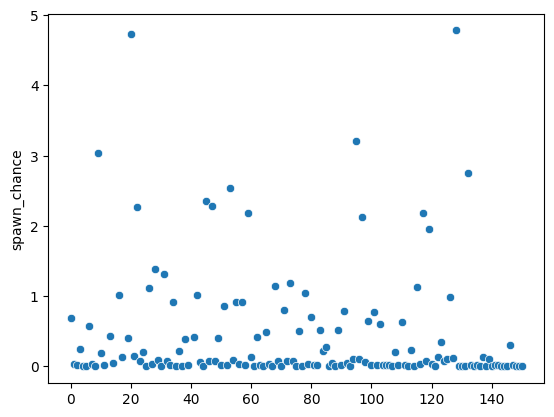

In [18]:
# ● Get all Pokemons whose spawn rate is less than 5%
sns.scatterplot(data=new_df_3[new_df_3["spawn_chance"] < 5]["spawn_chance"])

<Axes: ylabel='no_of_weakness'>

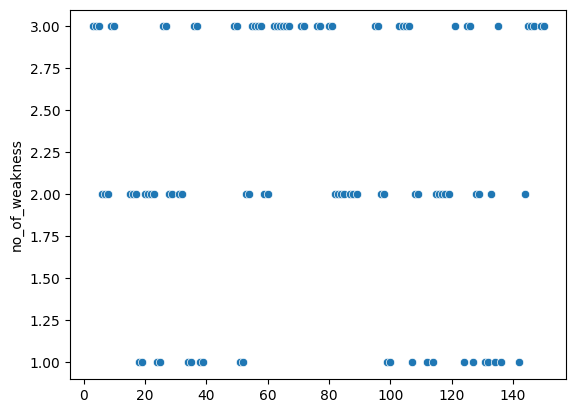

In [19]:
# Get all Pokemons that have less than 4 weaknesses
new_df_3["no_of_weakness"]= new_df_3["weakness"].str.split(",")
new_df_3["no_of_weakness"].str.len()
sns.scatterplot(data=new_df_3[new_df_3["no_of_weakness"].str.len() < 4]["no_of_weakness"].str.len())

In [ ]:
new_df_3["weakness"].str.len()

In [ ]:
# ● Get all Pokemons that have no multipliers at all
sns.scatterplot(data=new_df_3[new_df_3["multipliers"] == "-"]["multipliers"])

In [ ]:
#  Get all Pokemons that do not have more than 2 evolutions
sns.scatterplot(data=new_df_3[(new_df_3["next_evolution"] != "-" ) & (new_df_3["prev_evolution"] != "-")])

In [ ]:
#  Get all Pokemons whose spawn time is less than 300 seconds.
# Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
# new_df_3["spawn_time"].astype("datetime")

new_df_3['spawn_time'] = new_df_3["spawn_time"].replace("N/A","00:00")
new_df_3['spawn_time'] = pd.to_datetime(new_df_3['spawn_time'])
new_df_3["spawn_min"] = new_df_3['spawn_time'].dt.minute
sns.scatterplot(data=new_df_3[new_df_3["spawn_min"] < 5]["spawn_min"])

In [ ]:
# ● Get all Pokemon who have more than two types of capabilities

In [ ]:
new_df_3.columns


In [ ]:
df_4_new.dropna(inplace=True)
df_4_new["_year"] = df_4_new["year"].apply(lambda x:str(x).split("-")[0])
df_4_new["_year"] = df_4_new["_year"].astype(int)

In [ ]:
# Get all the Earth meteorites that fell before the year 2000
df_4_new[df_4_new["_year"] < 2000]["name"]

In [ ]:
# Get all the earth meteorites co-ordinates who fell before the year 1970
df_4_new["coordinates"] = df_4_new["geolocation"].apply(lambda x: [x["coordinates"] for i in x][0])
df_4_new["coordinates"]

In [ ]:
#● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg
df_4_new.sample()
sns.scatterplot(data=df_4_new[df_4_new["mass"] > 1000]["mass"])

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
df_5.sample()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
15,1453278,https://www.tvmaze.com/episodes/1453278/westwo...,Phase Space,2,6,regular,2018-05-27,21:00,60,7.7,"Maeve finds her daughter, Delores finds the ""r...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [21]:
def season_ratings(season):
    season_ratings = df_5[df_5["season"] == season]
    sns.scatterplot(data=season_ratings["average_rating"])

    plt.title(f"Season {season} Average Rating")

    plt.show()


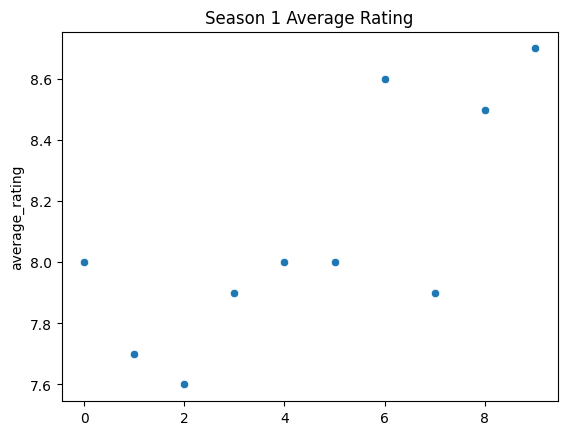

In [22]:
season_ratings(1)

In [ ]:
season_ratings(2)

In [ ]:
season_ratings(3)

In [ ]:
season_ratings(4)

In [23]:
df_5[df_5["average_rating"] > 8]["name"]

6                 Trompe L'Oeil
8     The Well-Tempered Clavier
9            The Bicameral Mind
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

In [24]:
average_8 = df_5[df_5["average_rating"] > 8]
average_8[["season", "name", "average_rating"]]

,season,name,average_rating
6,1,Trompe L'Oeil,8.6
8,1,The Well-Tempered Clavier,8.5
9,1,The Bicameral Mind,8.7
17,2,Kiksuya,8.7
18,2,Vanishing Point,8.4
19,2,The Passenger,8.5


In [25]:
df_5["year"] = df_5["airdate"].apply(lambda x:int(str(x).split("-")[0]))
before_2019 = df_5[df_5["year"] < 2019]
before_2019[["name","year"]]

,name,year
0,The Original,2016
1,Chestnut,2016
2,The Stray,2016
3,Dissonance Theory,2016
4,Contrapasso,2016
5,The Adversary,2016
6,Trompe L'Oeil,2016
7,Trace Decay,2016
8,The Well-Tempered Clavier,2016
9,The Bicameral Mind,2016


In [26]:
min_rating = df_5.groupby('season')['average_rating'].idxmin()
max_rating = df_5.groupby('season')['average_rating'].idxmax()
min_rating_ = df_5.loc[min_rating][["season","name","average_rating"]].reset_index()
max_rating_ = df_5.loc[max_rating][["season","name","average_rating"]].reset_index()

max_rating_.rename(columns={"average_rating":"max_rating", "name":"max_name"}, inplace=True)
min_rating_.rename(columns={"average_rating":"min_rating", "name":"min_name"}, inplace=True)

In [28]:
max_rating_

,index,season,max_name,max_rating
0,9,1,The Bicameral Mind,8.7
1,17,2,Kiksuya,8.7
2,20,3,Parce Domine,8.0
3,32,4,Zhuangzi,7.8


In [27]:
min_rating_

,index,season,min_name,min_rating
0,2,1,The Stray,7.6
1,14,2,Akane No Mai,7.6
2,25,3,Decoherence,7.5
3,28,4,The Auguries,7.1


In [29]:
min_rating_["max_name"] = max_rating_["max_name"]
min_rating_["max_rating"] = max_rating_["max_rating"]
min_rating_

,index,season,min_name,min_rating,max_name,max_rating
0,2,1,The Stray,7.6,The Bicameral Mind,8.7
1,14,2,Akane No Mai,7.6,Kiksuya,8.7
2,25,3,Decoherence,7.5,Parce Domine,8.0
3,28,4,The Auguries,7.1,Zhuangzi,7.8


In [33]:
average_8[["season", "name", "average_rating","summary"]]

,season,name,average_rating,summary
6,1,Trompe L'Oeil,8.6,While William and Dolores travel to the unclai...
8,1,The Well-Tempered Clavier,8.5,Bernard forces Robert to take him back into hi...
9,1,The Bicameral Mind,8.7,Delores finds out the truth about William's fa...
17,2,Kiksuya,8.7,Another of Westworld's Host revolutionaries is...
18,2,Vanishing Point,8.4,The Man learns that his grip on reality isn't ...
19,2,The Passenger,8.5,"The Man faces a personal reckoning, while Akec..."
